$$f(x)=\sum_1^{30}(x_i^2-10cos(2\pi x_i)+10)\quad -5.12\le x_i \le 5.12$$

In [1]:
import numpy as np

pop = np.random.rand(5,4)
print(pop)

cross_points = [False, True, False, True]
mutant = [0.35, 1., 0., 0.17]
pop = [0.09, 0.01, 0.4,0.21]
trial = np.where(cross_points,mutant,pop)
for i in range(len(pop)):
    print(i,pop[i]/(i+1))

[[0.65828902 0.67920773 0.63536043 0.22938025]
 [0.266196   0.88572549 0.34363559 0.96554664]
 [0.53209405 0.97125202 0.59518887 0.88755238]
 [0.60881364 0.50278228 0.02993698 0.52646051]
 [0.85960002 0.83030485 0.31628928 0.94444344]]
0 0.09
1 0.005
2 0.13333333333333333
3 0.0525


## 利用numpy实现函数

In [9]:
import numpy as np

def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if f < fitness[j]:
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

In [20]:
it = list(de(lambda x: sum(x**2)/len(x), bounds=[(-100, 100)]))
print(it[-1])

(array([3.70112332e-08]), 1.3698313821951413e-15)


In [21]:
it = list(de(lambda x: x**2, bounds=[(-100, 100)]))
print(it[-1])

(array([-1.34078735e-05]), array([1.79771071e-10]))


SyntaxError: invalid syntax (<ipython-input-11-104a05cab194>, line 2)

# test plt

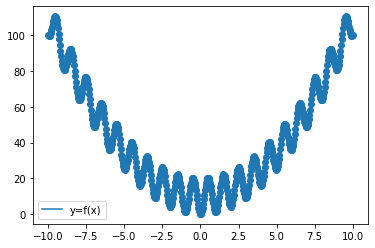

In [3]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 500)
y =x ** 2 - 10 * np.cos(2 * x * np.pi) + 10
plt.scatter(x,y)
plt.plot(x, y, label='y=f(x)')
plt.legend()

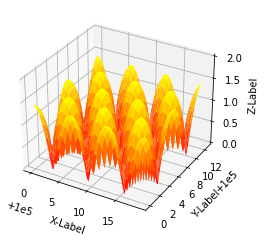

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# This example demonstrates mplot3d's offset text display.
# As one rotates the 3D figure, the offsets should remain oriented
# same way as the axis label, and should also be located "away"
# from the center of the plot.
#
# This demo triggers the display of the offset text for the x and
# y axis by adding 1e5 to X and Y. Anything less would not
# automatically trigger it.

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.mgrid[0:6*np.pi:0.25, 0:4*np.pi:0.25]
Z = np.sqrt(np.abs(np.cos(X) + np.cos(Y)))

surf = ax.plot_surface(X + 1e5, Y + 1e5, Z, cmap='autumn', cstride=2, rstride=2)
ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")
ax.set_zlabel("Z-Label")
ax.set_zlim(0, 2)

plt.show()

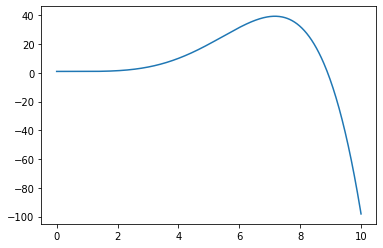

In [28]:
def fmodel(x, w):
    return w[0] + w[1]*x + w[2] * x**2 + w[3] * x**3 + w[4] * x**4 + w[5] * x**5
plt.plot(x, fmodel(x, [1.0, -0.01, 0.01, -0.1, 0.1, -0.01]))

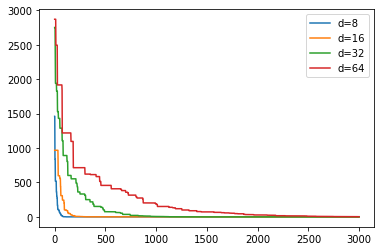

In [6]:
import numpy as np
import matplotlib.pyplot as plt


def de(fobj, bounds, mut=0.8, crossp=0.7, popsize=20, its=1000):
    dimensions = len(bounds)
    pop = np.random.rand(popsize, dimensions)
    min_b, max_b = np.asarray(bounds).T
    diff = np.fabs(min_b - max_b)
    pop_denorm = min_b + pop * diff
    fitness = np.asarray([fobj(ind) for ind in pop_denorm])
    best_idx = np.argmin(fitness)
    best = pop_denorm[best_idx,0]
    for i in range(its):
        for j in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != j]
            a, b, c = pop[np.random.choice(idxs, 3, replace = False)]
            mutant = np.clip(a + mut * (b - c), 0, 1)
            cross_points = np.random.rand(dimensions) < crossp
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            trial = np.where(cross_points, mutant, pop[j])
            trial_denorm = min_b + trial * diff
            f = fobj(trial_denorm)
            if (f < fitness[j]):
                fitness[j] = f
                pop[j] = trial
                if f < fitness[best_idx]:
                    best_idx = j
                    best = trial_denorm
        yield best, fitness[best_idx]

# result = list(de(lambda x: sum(x**2) /len(x), bounds=[(-100, 100)] * 32))

for d in [8, 16, 32, 64]:
    it = list(de(lambda x: sum(x**2)/d, [(-100, 100)] * d, its=3000))    
    x, f = zip(*it)
    plt.plot(f, label='d={}'.format(d))
plt.legend()

## scipy 中的函数

In [45]:
from scipy.optimize import differential_evolution
import numpy as np
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e
bounds = [(-5, 5)] * 2
result = differential_evolution(ackley, bounds)
result.x, result.fun


(array([0., 0.]), 4.440892098500626e-16)

In [31]:
from scipy.optimize import differential_evolution
import numpy as np
import math
result = differential_evolution(lambda x: math.cos(x**2)*3+2*x, bounds=[(-4, 4)])
result.x, result.fun
#lambda x:      x**2 / len(x), bounds=[(-100, 100)] * 32 × 不能执行 
#lambda x: sum(x**2) / len(x), bounds=[(-100, 100)] * 32 √ 可以执行是因为x是一个向量，sum之后是一个数。

(array([-3.97390771]), array([-10.93724287]))

In [ ]:

def fobj(x,y):
    return math.cos(x*y)*3+x+y